# <font color="orange">Lending Club Case Study</font>

## Import the python packages required for the Lending Club Case Study

In [451]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Data sourcing

In [452]:
df_lending_club = pd.read_csv("/Users/charanhulmani/Desktop/UpGrad/MSc-IITB & LJMU/Case Study/Lending Load club/loan.csv",header=0,
                 low_memory=False)

df_lending_club.head()
len(df_lending_club)


39717

## Data cleansing
`1. ` Remove id and member_id columns as they are just unique IDs of loan listing and borrower, which doesn't help to explore any relationships by analysizing the data

In [453]:
df_lending_club.drop(columns=['id','member_id'],inplace=True)

`2. ` Remove the variables having only one distinct value as these will not help to explore any relationships by analysizing the data

In [454]:
df_lending_club = df_lending_club[[col for col in df_lending_club.columns if len(df_lending_club[col].unique()) > 1]]


`3. ` Calculate the percentage of missing values of each column

In [455]:
df_lending_club.isnull().mean() * 100

loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000
delinq_2yrs                    0.000000
earliest_cr_line               0.000000
inq_last_6mths                 0.000000


`4.` Remove the columns which are missing 60% of values

In [456]:
min_count = (0.60) * df_lending_club.shape[0] + 1
df_lending_club.dropna(axis=1, thresh = min_count,inplace=True)

`5. ` Remove desc, title and url columns<br>
   -  Description column is missing 30% of values and it's high level info is covered in title<br>
   -  URL column doesn't have much info other than the loan id in the url query parameter
   -  After looking into the title closely, it is looking like a high level description of the loan `purpose` and it can be removed as the purpose column actually captured that data as a category

In [457]:
df_lending_club.drop(columns=['url','desc','title'],inplace=True)

`6. ` Check the value counts in each column of the dataframe to get an understanding of how the values are distributed

In [458]:
[(col, round((df_lending_club[col].value_counts().to_frame()/len(df_lending_club)) * 100)) for col in df_lending_club.columns]


[('loan_amnt',
         loan_amnt
  10000        7.0
  12000        6.0
  5000         5.0
  6000         5.0
  15000        5.0
  ...          ...
  22875        0.0
  8175         0.0
  19475        0.0
  21225        0.0
  22550        0.0
  
  [885 rows x 1 columns]),
 ('funded_amnt',
         funded_amnt
  10000          7.0
  12000          6.0
  5000           5.0
  6000           5.0
  15000          4.0
  ...            ...
  26250          0.0
  24725          0.0
  31750          0.0
  22625          0.0
  22350          0.0
  
  [1041 rows x 1 columns]),
 ('funded_amnt_inv',
                funded_amnt_inv
  5000.000000               3.0
  10000.000000              3.0
  6000.000000               3.0
  12000.000000              3.0
  8000.000000               2.0
  ...                       ...
  4944.213109               0.0
  18400.281660              0.0
  14659.820000              0.0
  6294.151315               0.0
  11808.924370              0.0
  
  [8205 rows x 1 co

`7. ` Plot histogram on collections_12_mths_ex_med , chargeoff_within_12_mths and tax_liens to visualize the distribution

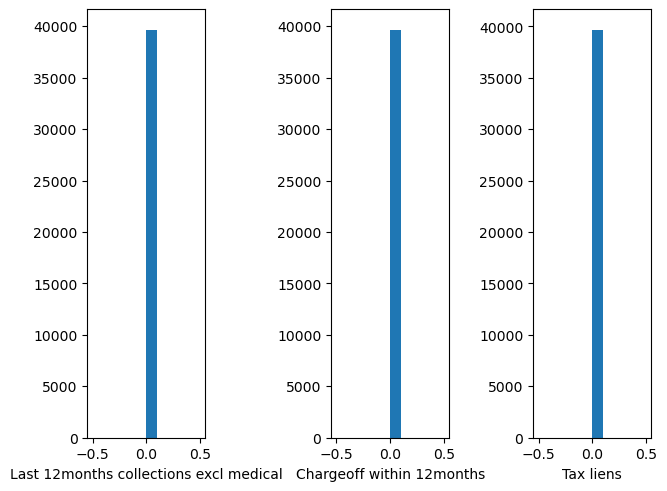

In [459]:
fig,(ax1,ax2,ax3) = plt.subplots(1, 3 , sharey = False, constrained_layout = True)
ax1.hist(df_lending_club.collections_12_mths_ex_med)
ax1.set_xlabel('Last 12months collections excl medical')
ax2.hist(df_lending_club.chargeoff_within_12_mths, )
ax2.set_xlabel('Chargeoff within 12months')
ax3.hist(df_lending_club.tax_liens)
ax3.set_xlabel('Tax liens')
plt.show()

`8. ` Below columns have values mostly 0 with few NAN(got to know after checking in excel spreadsheet). The columns/attributes/variables will not help in data analyis and thus they could be removed.<br>
   -  collections_12_mths_ex_med <br>
   -  chargeoff_within_12_mths <br>
   -  tax_liens

In [460]:
columns_to_remove = ['collections_12_mths_ex_med',
                     'chargeoff_within_12_mths',
                     'tax_liens']
df_lending_club.drop(columns = columns_to_remove,inplace = True)

`9. ` Check the value counts of the remaining columns of the dataframe to get an understanding of how the values are distributed. 

In [461]:
[(col, (round((df_lending_club[col].value_counts().to_frame()/len(df_lending_club)) * 100))) for col in df_lending_club.columns]


[('loan_amnt',
         loan_amnt
  10000        7.0
  12000        6.0
  5000         5.0
  6000         5.0
  15000        5.0
  ...          ...
  22875        0.0
  8175         0.0
  19475        0.0
  21225        0.0
  22550        0.0
  
  [885 rows x 1 columns]),
 ('funded_amnt',
         funded_amnt
  10000          7.0
  12000          6.0
  5000           5.0
  6000           5.0
  15000          4.0
  ...            ...
  26250          0.0
  24725          0.0
  31750          0.0
  22625          0.0
  22350          0.0
  
  [1041 rows x 1 columns]),
 ('funded_amnt_inv',
                funded_amnt_inv
  5000.000000               3.0
  10000.000000              3.0
  6000.000000               3.0
  12000.000000              3.0
  8000.000000               2.0
  ...                       ...
  4944.213109               0.0
  18400.281660              0.0
  14659.820000              0.0
  6294.151315               0.0
  11808.924370              0.0
  
  [8205 rows x 1 co

`9. ` Looking at the above value counts, 85+ percent of the values in the below variables are having zero values and thus these variables doesn't help in finding a relationship to see whether the loan may go default because of these variables. So, removing these variables. `(Not plotting the histogram again)`<br>
   - delinq_2yrs
   - pub_rec
   - out_prncp
   - out_prncp_inv
   - total_rec_late_fee
   - recoveries
   - collection_recovery_fee
   - pub_rec_bankruptcies

In [462]:
columns_to_remove= ['delinq_2yrs', 
                    'pub_rec', 
                    'out_prncp', 
                    'out_prncp_inv',
                    'total_rec_late_fee',
                    'recoveries',
                    'collection_recovery_fee',
                    'pub_rec_bankruptcies']

df_lending_club.drop(columns=columns_to_remove,inplace=True)


`10. ` If the loan_status is 'current', then that loan data will not help in identifying either a default or non-default loan borrower. So, remove the rows with loan_status is 'current'

In [463]:
df_lending_club = df_lending_club[(df_lending_club['loan_status'] != 'Current')]

`11. ` Find the percentage of null values in the dataframe

In [464]:
df_lending_club.isnull().mean()*100

loan_amnt              0.000000
funded_amnt            0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_title              6.185033
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
zip_code               0.000000
addr_state             0.000000
dti                    0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
revol_bal              0.000000
revol_util             0.129611
total_acc              0.000000
total_pymnt            0.000000
total_pymnt_inv        0.000000
total_rec_prncp        0.000000
total_rec_int          0.000000
last_pymnt_d           0.184047
last_pymnt_amnt        0.000000
last_cre

`12. ` Standardize the values in emp_length(employee experience). Remove anything other than numbers from 0-9 and < symbol. Furthermore, impute NaN values with median Experience

In [465]:
def standardize_emp_length(emp_experience:str):
    emp_experience = re.sub(r'[^<,0-9]','',str(emp_experience))
    if emp_experience == '<1':
        return 0
    elif emp_experience == '':
        return np.nan
    else:
        return emp_experience

    
df_lending_club['emp_length'] = df_lending_club['emp_length'].apply(lambda x :standardize_emp_length(str(x)))

df_lending_club[['emp_length']]= df_lending_club[['emp_length']].fillna(np.median)

`13. ` Standardize term by removing the word months

In [466]:
df_lending_club['term'].replace(regex = '[^0-9]',value = '',inplace = True)

`14. ` Round off numeric decimal values with precision 2

In [467]:
df_lending_club = df_lending_club.round(decimals = 2)
df_lending_club.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt          38577 non-null  int64  
 2   funded_amnt_inv      38577 non-null  float64
 3   term                 38577 non-null  object 
 4   int_rate             38577 non-null  object 
 5   installment          38577 non-null  float64
 6   grade                38577 non-null  object 
 7   sub_grade            38577 non-null  object 
 8   emp_title            36191 non-null  object 
 9   emp_length           38577 non-null  object 
 10  home_ownership       38577 non-null  object 
 11  annual_inc           38577 non-null  float64
 12  verification_status  38577 non-null  object 
 13  issue_d              38577 non-null  object 
 14  loan_status          38577 non-null  object 
 15  purpose              38577 non-null 

### Data Analysis
`1. ` Remove Customer behavior attributes. Behavior data is collected after lending the loan and doesn't help for risk analysis for new applicants<br>
   - Remove below columns/variable
       - issue_d
       - earliest_cr_line
       - inq_last_6mths
       - open_acc
       - revol_bal
       - total_acc
       - revol_util
       - total_pymnt
       - total_pymnt_inv
       - total_rec_prncp
       - total_rec_int
       - last_pymnt_d
       - last_pymnt_amnt
       - last_credit_pull_d

In [468]:
columns_to_remove = ['issue_d',
           'earliest_cr_line',
           'inq_last_6mths',
           'open_acc',
           'revol_bal',
           'revol_util',
           'total_acc',
           'total_pymnt',
           'total_pymnt_inv',
           'total_rec_prncp',
           'total_rec_int',
           'last_pymnt_d',
           'last_pymnt_amnt',
          'last_credit_pull_d']
df_lending_club.drop(columns = columns_to_remove, inplace = True)


In [469]:
df_lending_club.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt          38577 non-null  int64  
 2   funded_amnt_inv      38577 non-null  float64
 3   term                 38577 non-null  object 
 4   int_rate             38577 non-null  object 
 5   installment          38577 non-null  float64
 6   grade                38577 non-null  object 
 7   sub_grade            38577 non-null  object 
 8   emp_title            36191 non-null  object 
 9   emp_length           38577 non-null  object 
 10  home_ownership       38577 non-null  object 
 11  annual_inc           38577 non-null  float64
 12  verification_status  38577 non-null  object 
 13  loan_status          38577 non-null  object 
 14  purpose              38577 non-null  object 
 15  zip_code             38577 non-null 

`2. ` Change data type of int_rate to numeric float

In [475]:
df_lending_club[['int_rate']] = df[['int_rate']].apply(pd.to_numeric)

`3. ` Drop duplicates, if exist. In this case, no duplicates tuple of records founds after doing all the above cleansing

In [476]:
df_lending_club.drop_duplicates(inplace = True)

In [478]:
df_lending_club.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,zip_code,addr_state,dti
0,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,10,RENT,24000.0,Verified,Fully Paid,credit_card,860xx,AZ,27.65
1,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,Source Verified,Charged Off,car,309xx,GA,1.00
2,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,10,RENT,12252.0,Not Verified,Fully Paid,small_business,606xx,IL,8.72
3,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Fully Paid,other,917xx,CA,20.00
5,5000,5000,5000.0,36,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,Source Verified,Fully Paid,wedding,852xx,AZ,11.20
6,7000,7000,7000.0,60,15.96,170.08,C,C5,Southern Star Photography,8,RENT,47004.0,Not Verified,Fully Paid,debt_consolidation,280xx,NC,23.51
7,3000,3000,3000.0,36,18.64,109.43,E,E1,MKC Accounting,9,RENT,48000.0,Source Verified,Fully Paid,car,900xx,CA,5.35
8,5600,5600,5600.0,60,21.28,152.39,F,F2,NaN,4,OWN,40000.0,Source Verified,Charged Off,small_business,958xx,CA,5.55
9,5375,5375,5350.0,60,12.69,121.45,B,B5,Starbucks,0,RENT,15000.0,Verified,Charged Off,other,774xx,TX,18.08
10,6500,6500,6500.0,60,14.65,153.45,C,C3,Southwest Rural metro,5,OWN,72000.0,Not Verified,Fully Paid,debt_consolidation,853xx,AZ,16.12


`4. ` Loan amount should be  >= funded amount and >= funded amount by investor. And, funded amount should be >= funded amount by investor. Here, in this dataset all the records are satisfying this condition.

In [493]:
print("Total records count before filtering based on loan amount,funded amount and by funded by investor", len(df_lending_club))
df_lending_club = df_lending_club[
                  (df_lending_club.loan_amnt >= df_lending_club.funded_amnt)
                & (df_lending_club.loan_amnt >= df_lending_club.funded_amnt_inv) 
                & (df_lending_club.funded_amnt >= df_lending_club.funded_amnt_inv)]

print("Total records count after filtering based on loan amount,funded amount and by funded by investor", len(df_lending_club))

df_lending_club.isnull().mean() * 100

Total records count before filtering based on loan amount,funded amount and by funded by investor 38577
Total records count after filtering based on loan amount,funded amount and by funded by investor 38577


loan_amnt              0.000000
funded_amnt            0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               4.715245
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_title              6.185033
emp_length             0.000000
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
loan_status            0.000000
purpose                0.000000
zip_code               0.000000
addr_state             0.000000
dti                    0.000000
dtype: float64

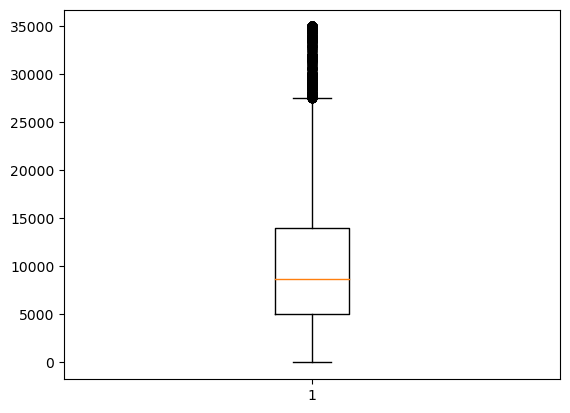

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti
loan_amnt,1.000000,0.981790,0.937922,0.286332,0.932260,0.268999,0.062436
funded_amnt,0.981790,1.000000,0.956172,0.291306,0.958035,0.264798,0.062194
funded_amnt_inv,0.937922,0.956172,1.000000,0.283679,0.905464,0.251981,0.070663
int_rate,0.286332,0.291306,0.283679,1.000000,0.264314,0.050777,0.111359
installment,0.932260,0.958035,0.905464,0.264314,1.000000,0.267842,0.052038
annual_inc,0.268999,0.264798,0.251981,0.050777,0.267842,1.000000,-0.121530
dti,0.062436,0.062194,0.070663,0.111359,0.052038,-0.121530,1.000000


In [485]:

plt.boxplot(df_lending_club.funded_amnt_inv)
plt.show()
df_lending_club.corr()

In [324]:

    # Check outliers
fig, (ax1, ax2) = plt.subplots(1,2, sharey=False, constrained_layout = True)
fig.tight_layout()
ax1.set_title('Box Plot Annual Income')
ax1.set_xlabel('Annual Income')
ax1.set_ylabel("Income")
ax1.set_yscale('log')
ax1.boxplot(df.last_pymnt_amnt)

ax2.set_title('Box Plot Interest Rate')
ax2.set_xlabel('Interest')
ax2.set_ylabel("Rate")
ax2.boxplot(df.int_rate)
plt.show()

    #Remove outliers, Now after plotting, we know that there are no Outliers in the lower side for int_rate and annual_inc. We still would like to make sure those will get removed, if any
Q1,Q3 = np.percentile(df['int_rate'],q=[25,75])
IQR = Q3 - Q1
df = df[~((df['int_rate'] < (Q1 - 1.5 * IQR)) | (df['int_rate'] > (Q3 + 1.5 * IQR)))]
   

    #df.annual_inc.describe()
Q1,Q3 = np.percentile(df['annual_inc'],q=[25,75])
IQR = Q3 - Q1
    #print(len(df))
df = df[~((df['annual_inc'] < (Q1 - 1.5 * IQR)) | (df['annual_inc'] > (Q3 + 1.5 * IQR)))]
    #print(len(df))

#df[(df.funded_amnt> df.funded_amnt_inv)]

IndentationError: expected an indented block (3780359623.py, line 17)

In [479]:
df_lending_club.to_excel("/Users/charanhulmani/Desktop/UpGrad/MSc-IITB & LJMU/Case Study/Lending Load club/loanfiltered.xlsx")

